https://writeren.tistory.com/68

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId : 승객 번호

- Survived : 생존여부(1: 생존, 0 : 사망)

- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)

- Name : 승객 이름

- Sex : 승객 성별

- Age : 승객 나이 

- SibSp : 동반한 형제자매, 배우자 수

- Patch : 동반한 부모, 자식 수

- Ticket : 티켓의 고유 넘버

- Fare 티켓의 요금

- Cabin : 객실 번호

- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Train 데이터는 891개의 행이 있습니다. Age에 177개의 결측지, Cabin에 687개 결측치 그리고 Embarked에는 2개의 결측치가 있습니다.

Age : 결측치가 많지않고 나이에 따라 생존 여부와 상관 있을 것으로 예상되어 데이터 채워 넣어야 함

Cabin : 객실 번호가 생존 여부와 관련 있을 수 있으나 결측치가 너무 많기때문에 제거하는 것이 나을 것으로 보임

Embarked : 2개의 결측치가 있으므로 어느 값으로 채워도 문제 없어 보임

## 그래프를 이용한 데이터 분석



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
def bar_chart(feature) :
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

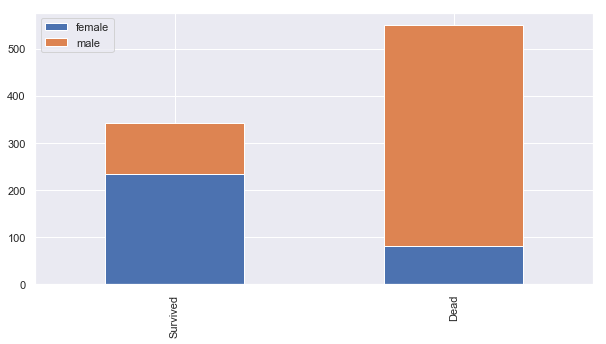

In [6]:
bar_chart('Sex')

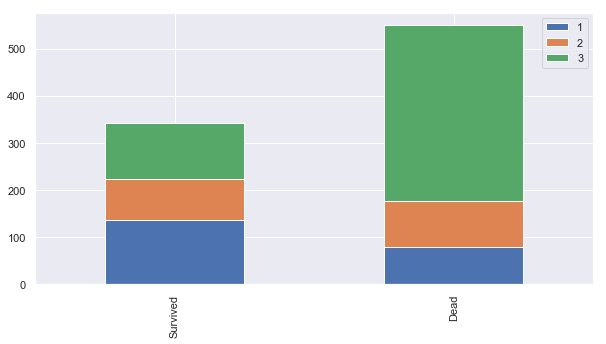

In [7]:
bar_chart('Pclass')

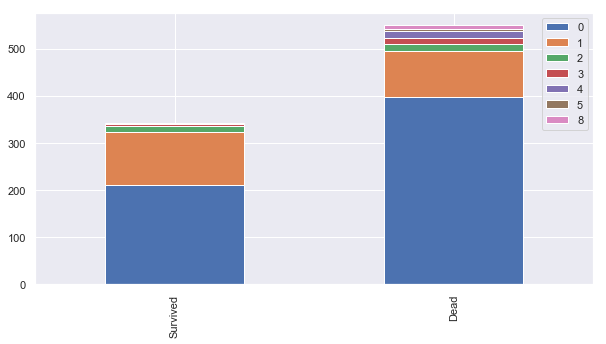

In [8]:
bar_chart('SibSp')

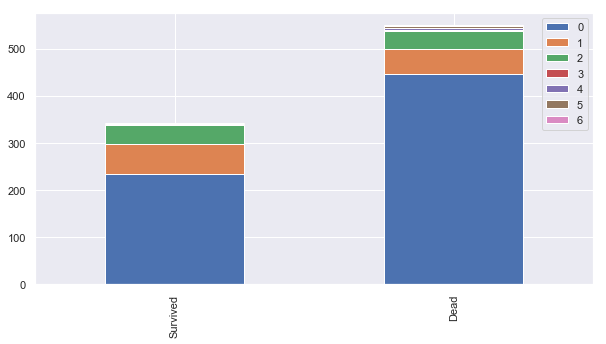

In [9]:
bar_chart('Parch')

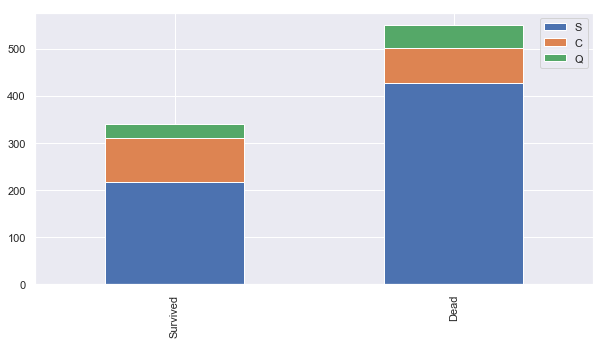

In [10]:
bar_chart('Embarked')

지금까지 데이터를 분석한 결과 Pclass, Sex, Age, SibSp, Parch, Embarked 컬럼의 경우 실제로 Survived에 영향을 미치는 것을 알 수 있습니다. 이를 바탕으로 데이터를 Feature Engineering을 진행할 것입니다. 

In [11]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Maenpaa, Mr. Matti Alexanteri",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


위 정보에서 얻을 수 있는 사실은 아래와 같습니다.
1. Age의 약 20프의 데이터가 Null로 되어있다.
2. Cabin의 대부분 값은 Null이다.
3. Name, Sex, Ticket, Cabin, Embarked는 숫자가 아닌 문자 값이다.
   - 연관성 없는 데이터는 삭제하거나 숫자로 바꿀 예정입니다.
     (머신러닝은 숫자를 인식하기 때문입니다.)

그리고 이를 바탕으로 이렇게 데이터를 가공해 보겠습니다.
1. Cabin과 Ticket 두 값은 삭제한다.(값이 비어있고 연관성이 없다는 판단하에)
2. Embarked, Name, Sex 값은 숫자로 변경할 것 입니다.
3. Age의 Null 데이터를 채워 넣을 것입니다.
4. Age의 값의 범위를 줄일 것입니다.(큰 범위는 머신러닝 분석시 좋지 않습니다.)
5. Fare의 값도 범위를 줄일 것입니다

## Cabin, Ticket 값 삭제
Drop를 이용하여 Cabin과 Ticket 값을 삭제하였습니다. 다른 분들이 한 것을 보면 Cabin과 Ticket을 활용해서도 새로운 데이터를 가공해 내었지만 아직 저는 부족하여 두 데이터를 삭제하였습니다.

In [12]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'],axis=1)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


##Embarked 값 가공

먼저 Embarked의 각각 값의 갯수(S, C, Q)부터 살펴보겠습니다. 앞서 Embarked는 2개의 값이 Null이라는 것을 알 수 있었습니다.

In [14]:
southampton = train[train["Embarked"]=="S"].shape[0]
print("S : ", southampton)
cherbourg = train[train["Embarked"]=="C"].shape[0]
print("C : ", cherbourg)
queenstown = train[train["Embarked"]=="Q"].shape[0]
print("Q : ", queenstown)

S :  644
C :  168
Q :  77


In [15]:
train = train.fillna({"Embarked" : "S"})

In [16]:
embarked_mapping = {"S" :1, "C" : 2, "Q" : 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


## Name 값 가공하기
Name의 경우는 간단하게 문자열 파싱을 통해 가공해 보았습니다. 각각 이름은 남자와 여자 등을 뜻하는 Mr, Mrs가 있습니다. 이 부분을 가공해서 어떤 데이터가 있는지 보았습니다. 그리고 성별과 비교하여 Mr, MrS, Miss 데이터가 비슷한지 보았습니다.

In [17]:
combine = [train, test]

for dataset in combine :
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don','Dr','Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [19]:
title_mapping = {"Mr": 1, "Miss" : 2, "Mrs"  : 3, "Master":4, "Royal":5, "Rare" : 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [20]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [21]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in combine :
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


In [22]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager','Student','Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


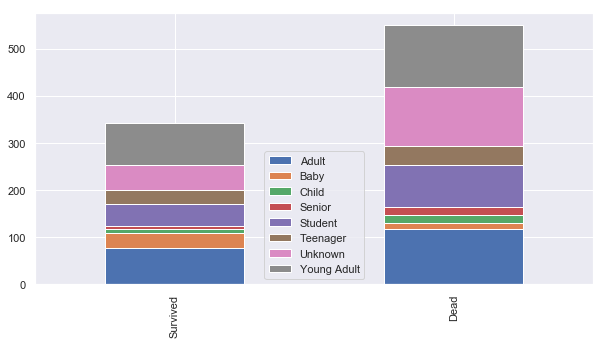

In [23]:
bar_chart('AgeGroup')

In [24]:
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult",6:"Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult


In [25]:
age_mapping = {'Baby': 1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult' : 5, 'Adult':6,'Senior':7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)


train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4
1,1,1,1,1,0,71.2833,2,3,6
2,1,3,1,0,0,7.9250,1,2,5
3,1,1,1,1,0,53.1000,1,3,5
4,0,3,0,0,0,8.0500,1,1,5


In [26]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1,2,3, 4])

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4,1
1,1,1,1,1,0,2,3,6,4
2,1,3,1,0,0,1,2,5,2
3,1,1,1,1,0,1,3,5,4
4,0,3,0,0,0,1,1,5,2


https://writeren.tistory.com/93?category=757132

In [34]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    891 non-null int64
FareBand    891 non-null category
dtypes: category(1), int64(8)
memory usage: 56.8 KB


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

테스트 모델을 찾기 전에 K-fold cross validation을 사용하여 정확도를 향상시킬 것입니다. K-fold cross validation은 교차 검증의 한 방법으로 일반적으로 검증용 데이터가 별도로 존재하는 경우가 많지 않기 때문에 보통은 원래 학습용으로 확보한 데이터를 학습용과 검증용으로 분리하여 학습용 데이터로 학습한 후 검증용 데이터로 검증합니다. 이 때 데이터를 어떻게 분리하느냐에 따라 검증 성능이 달라 질 수 있습니다. 여러가지 방식으로 데이터를 분리하여 검증을 실시하고 평균성능과 성능분산을 모두 구합니다. 이러한 방법을 교차검증이라고 합니다.

K-fold CV는 데이터 셋을 K개의 Sub-set로 분리하는 방법으로 분리된 K개의 sub-set 중 하나만 제외한 K-1개의 sub-sets를 training set으로 이용하는 K개의 모형을 추정합니다.

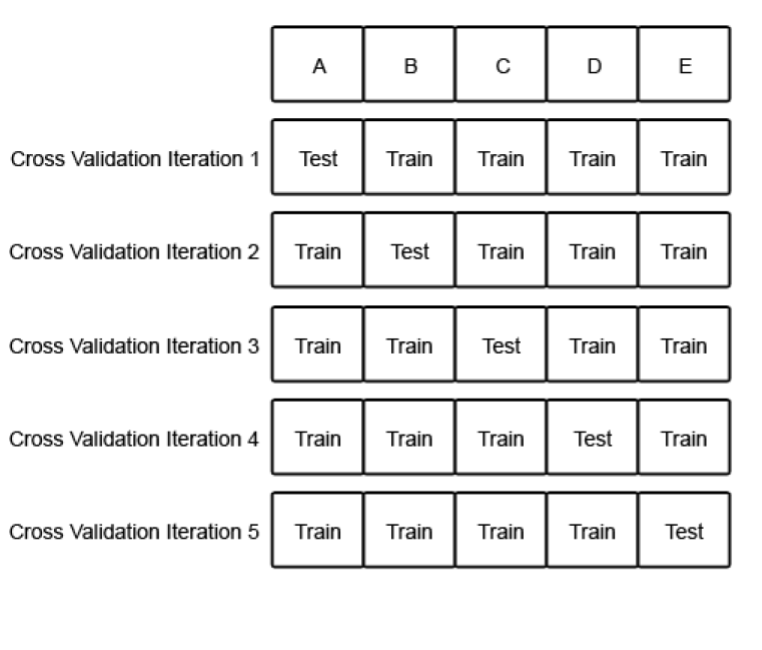
K-fold CV를 활용하여 Train set 데이터를 10개의 fold로 나눠보겠습니다.

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

랜덤포레스트는 머신러닝의 알고리즘

In [38]:
clf = RandomForestClassifier(n_estimators=13)  #13개의 decision tree사용


In [63]:
#clf.fit(k_fold)
clf.fit(train_data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.82022472 0.7752809  0.76404494 0.86516854 0.83146067
 0.82022472 0.84269663 0.78651685 0.83146067]


In [65]:
# decision tree Score
round(np.mean(score)*100, 2)

81.48

In [42]:
#clf.fit(train_data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:

#clf.fit(train_data)#test_data = test
prediction = clf.predict(test1)

In [62]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [54]:
#test[test.isna()]
test = test.dropna()

In [53]:
test[test.isna()]

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Sex            417 non-null int64
SibSp          417 non-null int64
Parch          417 non-null int64
Embarked       417 non-null int64
Title          417 non-null int64
AgeGroup       417 non-null int64
FareBand       417 non-null category
dtypes: category(1), int64(8)
memory usage: 29.9 KB


In [60]:
test1 = test.drop(['PassengerId'], axis = 1)